# Implementing Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 1. Load the dataset and preprocess the data

In [2]:
# Load the dataset
titanic_data = pd.read_csv('titanicdata.csv')

# Set random seed
np.random.seed(42)

In [3]:
# Split the data into features (X) and target variable (y)
X = titanic_data[['Age', 'Sex', 'Pclass']]
y = titanic_data['Survived']

# Split the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features within the 0-1 range using MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 2. Implement the logistic regression model

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.val_losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_cost(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def gradient_descent(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)

        dw = 1/m * np.dot(X.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        n_features = X_train.shape[1]
        self.initialize_parameters(n_features)

        for i in range(self.num_iterations):
            self.gradient_descent(X_train, y_train)
            train_loss = self.compute_cost(X_train, y_train)
            self.train_losses.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self.compute_cost(X_val, y_val)
                self.val_losses.append(val_loss)

            """
            if i % 100 == 0:
                if X_val is not None and y_val is not None:
                    print(f"Iteration {i}: Training Loss = {train_loss}, Validation Loss = {val_loss}")
                else:
                    print(f"Iteration {i}: Training Loss = {train_loss}")
            """

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)

## 3. Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation data. Plot both the training and validation losses across 100 iterations.

Validation Loss: 0.5020058575164894


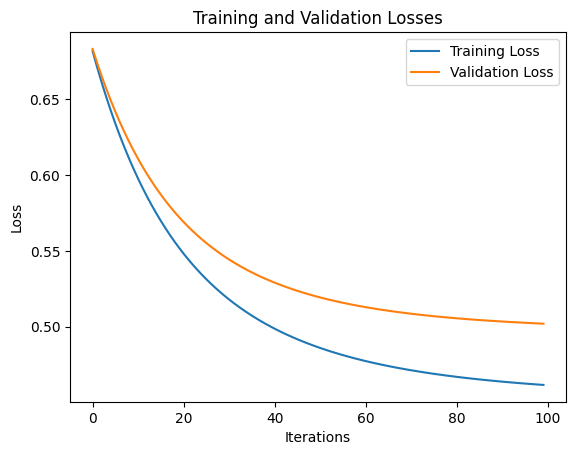

In [5]:
# Train the model and calculate losses
model = LogisticRegression(learning_rate=0.1, num_iterations=100)
model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

val_loss = model.compute_cost(X_val_scaled, y_val)
print(f"Validation Loss: {val_loss}")

# Plot training and validation losses across iterations
plt.plot(range(len(model.train_losses)), model.train_losses, label='Training Loss')
plt.plot(range(len(model.val_losses)), model.val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

## 4. Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values of these hyperparameters.

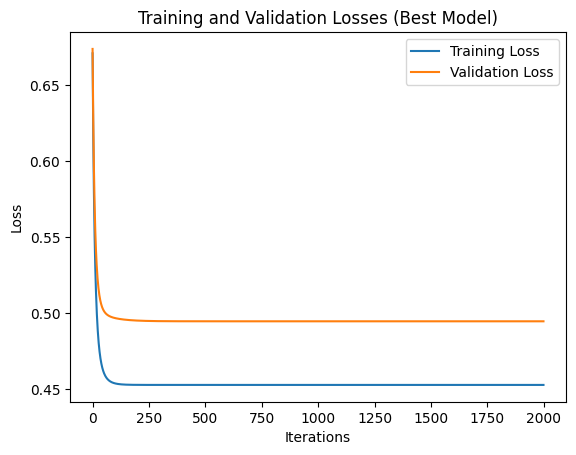

Best Learning Rate: 0.2
Best Number of Iterations: 2000
Best Validation Loss: 0.494793753313271


In [6]:
best_loss = float('inf')
best_learning_rate = None
best_num_iterations = None
best_model = None

learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]
num_iterations_list = [100, 200, 500, 1000, 2000]

for learning_rate in learning_rates:
    for num_iterations in num_iterations_list:
        model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
        model.fit(X_train_scaled, y_train, X_val_scaled, y_val)
        val_loss = model.val_losses[-1]  # Get the final validation loss
        
        #print(f"Learning Rate: {learning_rate}, Num Iterations: {num_iterations}, Validation Loss: {val_loss}")
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_learning_rate = learning_rate
            best_num_iterations = num_iterations
            best_model = model

# Plot the loss curve for the best model
plt.plot(range(len(best_model.train_losses)), best_model.train_losses, label='Training Loss')
plt.plot(range(len(best_model.val_losses)), best_model.val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (Best Model)')
plt.legend()
plt.show()

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Number of Iterations: {best_num_iterations}")
print(f"Best Validation Loss: {best_loss}")

## 5. Combine the validation and training data and retrain the final model with the chosen hyperparameters.

In [7]:
# Combine training and validation data
X_train_final = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

# Usage for final model fitting
final_model = LogisticRegression(learning_rate=best_learning_rate, num_iterations=best_num_iterations)
final_model.fit(X_train_final, y_train_final, X_val=X_test_scaled, y_val=y_test)

# Calculate the loss on the test data
test_loss = final_model.compute_cost(X_test_scaled, y_test)
print(f"Final Test Loss: {test_loss}")

Final Test Loss: 0.413151685404943


## 6. Evaluate the accuracy of your model on the testing data and report the results.

In [8]:
# Make predictions on the test data
y_pred_test = final_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = np.mean(y_pred_test == y_test)
print(f"Accuracy on Testing Data: {accuracy}")

Accuracy on Testing Data: 0.8156424581005587
